In [1]:
import pandas as pd
df = pd.read_csv('all_protein_data_19.csv', index_col=0)
df.sample(5)

,#Replicon Name,Replicon Accession,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,...,Accession Version,Organism,Definition,Division,Topology,Molecule Type,Molecular Weight,Number of Regions,Number of Binding Sites,Sequence
102906,19,NC_000019.10,6175313,6190657,+,81616,ACSBG2,XP_011526631.1,459,long-chain-fatty-acid--CoA ligase ACSBG2 isofo...,...,XP_011526631.1,Homo sapiens,long-chain-fatty-acid--CoA ligase ACSBG2 isofo...,PRI,linear,AA,51554,1,3,mywgifqeqgkqqqtrqtqsgpweqirneqmktfslcdmitwiaga...
103585,19,NC_000019.10,11349952,11354752,+,126075,CCDC159,XP_016881751.1,291,coiled-coil domain-containing protein 159 isof...,...,XP_016881751.1,Homo sapiens,coiled-coil domain-containing protein 159 isof...,PRI,linear,AA,32753,0,0,mipdsqkllrceleslksqlqaqtkafeflnhsvtmlekesclqqi...
3239,Un,NT_187639.1,2635,18876,-,3812,KIR3DL2,NP_001229796.1,438,killer cell immunoglobulin-like receptor 3DL2 ...,...,NP_001229796.1,Homo sapiens,killer cell immunoglobulin-like receptor 3DL2 ...,PRI,linear,AA,46277,4,4,msltvvsmacvgffllqgawplmggqdkpflsarpstvvprgghva...
106282,19,NC_000019.10,43193372,43205536,-,5672,PSG4,NP_001263424.1,326,pregnancy-specific beta-1-glycoprotein 4 isofo...,...,NP_001263424.1,Homo sapiens,pregnancy-specific beta-1-glycoprotein 4 isofo...,PRI,linear,AA,33128,6,1,mgplsappctqritwkgvlltasllnfwnppttaqvtieaqppkvs...
5606,Un,NW_016107305.1,105235,115737,+,3805,KIR2DL4,NP_001074239.1,342,killer cell immunoglobulin-like receptor 2DL4 ...,...,NP_001074239.1,Homo sapiens,killer cell immunoglobulin-like receptor 2DL4 ...,PRI,linear,AA,34844,2,0,msmsptviilaclgffldqsvwahvggqdkpfcsawpsavvpqggh...


In [2]:
df.columns

Index(['#Replicon Name', 'Replicon Accession', 'Start', 'Stop', 'Strand',
       'GeneID', 'Locus', 'Protein product', 'Length', 'Protein name',
       '# Sequence-Name', 'Sequence-Role', 'Assigned-Molecule',
       'Assigned-Molecule-Location/Type', 'GenBank-Accn', 'Relationship',
       'RefSeq-Accn', 'Assembly-Unit', 'Sequence-Length', 'UCSC-style-name',
       'Chromosome', 'Accession Version', 'Organism', 'Definition', 'Division',
       'Topology', 'Molecule Type', 'Molecular Weight', 'Number of Regions',
       'Number of Binding Sites', 'Sequence'],
      dtype='object')

In [3]:
df['Assigned-Molecule'].unique()

array([19], dtype=int64)

In [4]:
df['Organism'].unique()

array(['Homo sapiens'], dtype=object)

In [5]:
df['#Replicon Name'].unique()

array(['19', 'Un'], dtype=object)

In [6]:
df['Replicon Accession'].unique()

array(['NC_000019.10', 'NT_187622.1', 'NT_187621.1', 'NW_021160022.1',
       'NW_003315962.1', 'NW_003315964.2', 'NW_003315965.1',
       'NW_003315963.1', 'NT_187619.1', 'NW_014040929.1',
       'NW_009646206.1', 'NT_187620.1', 'NW_003571054.1',
       'NW_003571055.2', 'NW_003571056.2', 'NW_003571057.2',
       'NW_003571058.2', 'NW_003571059.2', 'NW_003571060.1',
       'NW_016107300.1', 'NW_016107301.1', 'NW_016107302.1',
       'NW_016107303.1', 'NW_016107304.1', 'NW_016107305.1',
       'NW_016107306.1', 'NW_016107307.1', 'NW_016107308.1',
       'NW_016107309.1', 'NW_016107311.1', 'NW_016107312.1',
       'NW_016107313.1', 'NW_016107314.1', 'NT_187636.1', 'NT_187637.1',
       'NT_187638.1', 'NT_187639.1', 'NT_187640.1', 'NT_187641.1',
       'NT_187642.1', 'NT_187643.1', 'NT_187644.1', 'NT_187645.1',
       'NT_187668.1', 'NT_187669.1', 'NT_187670.1', 'NT_187671.1',
       'NT_187672.1', 'NT_187673.1', 'NT_187674.1', 'NT_187675.1',
       'NT_187676.1', 'NT_187677.1', 'NT_1876

In [7]:
df['Chromosome'].unique()

array([19], dtype=int64)

In [8]:
df['Division'].unique()

array(['PRI'], dtype=object)

In [9]:
df['Topology'].unique()

array(['linear'], dtype=object)

In [10]:
df['Molecule Type'].unique()

array(['AA'], dtype=object)

In [11]:
to_drop = ['Organism', 'Replicon Accession', 'Chromosome', 'Division', 'Definition', 'Topology', 
           'Molecule Type', 'Assigned-Molecule', 'Assigned-Molecule-Location/Type', 'GenBank-Accn', 'Relationship']

In [12]:
df = df.drop(to_drop, axis=1)

In [13]:
df.sample(5)

,#Replicon Name,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,...,Relationship,RefSeq-Accn,Assembly-Unit,Sequence-Length,UCSC-style-name,Accession Version,Molecular Weight,Number of Regions,Number of Binding Sites,Sequence
3647,Un,132982,144581,-,115653,KIR3DL3,NP_703144.3,410,killer cell immunoglobulin-like receptor 3DL3 ...,HSCHR19KIR_ABC08_AB_HAP_T_P_CTG3_1,...,=,NT_187673.1,ALT_REF_LOCI_25,170701.0,chr19_KI270919v1_alt,NP_703144.3,42258,4,6,mslmvvsmacvgffllegpwphvggqdkpflsawpgtvvsegqhvt...
3822,Un,55709,65799,-,3805,KIR2DL4,NP_001074241.1,273,killer cell immunoglobulin-like receptor 2DL4 ...,HSCHR19KIR_FH13_BA2_HAP_CTG3_1,...,=,NT_187686.1,ALT_REF_LOCI_33,215732.0,chr19_KI270932v1_alt,NP_001074241.1,27745,3,0,msmsptviilaclgffldqsvwahvggqdkpfcsawpsavvpqggh...
106819,19,46720602,46738813,-,29888,STRN4,XP_016882206.1,641,striatin-4 isoform X4,19,...,=,NC_000019.10,Primary Assembly,58617616.0,chr19,XP_016882206.1,69123,10,1,mleyalkqerakyhklkfgtdlnqgekkadvseqvsngpvesvtle...
5674,Un,22123,37696,-,2204,FCAR,NP_579807.1,179,immunoglobulin alpha Fc receptor isoform e,HSCHR19KIR_HG2393_CTG3_1,...,=,NW_016107312.1,PATCHES,156965.0,na,NP_579807.1,20223,1,0,mdpkqttllclgdfpmpfisaksspvipldgsvkiqcqaireaylt...
107100,19,48756237,48758220,+,26291,FGF21,NP_061986.1,209,fibroblast growth factor 21 precursor,19,...,=,NC_000019.10,Primary Assembly,58617616.0,chr19,NP_061986.1,19411,1,2,mdsdetgfehsglwvsvlaglllgacqahpipdsspllqfggqvrq...


In [14]:
# nans identification
print(len(df))
df.isna().sum()

27581


#Replicon Name                     0
Start                              0
Stop                               0
Strand                             0
GeneID                             0
Locus                              0
Protein product                    0
Length                             0
Protein name                       0
# Sequence-Name                    0
Sequence-Role                      0
Assigned-Molecule-Location/Type    0
GenBank-Accn                       0
Relationship                       0
RefSeq-Accn                        0
Assembly-Unit                      0
Sequence-Length                    0
UCSC-style-name                    0
Accession Version                  0
Molecular Weight                   0
Number of Regions                  0
Number of Binding Sites            0
Sequence                           0
dtype: int64

In [15]:
print('duplicated rows: ' + str(df.duplicated().sum()))

duplicated rows: 19600


In [16]:
# code to drop duplicate row if necessary
df.drop_duplicates(inplace=True)
print('duplicated rows: ' + str(df.duplicated().sum()))
print(len(df))

duplicated rows: 0
7981


In [17]:
df.index

Int64Index([102114, 102115, 102116, 102117, 102118, 102119, 102120, 102121,
            102122, 102123,
            ...
              4523,   4524,   4525,   4582,   4641,   4701,   4702,   4703,
              4704,   4728],
           dtype='int64', length=7981)

In [18]:
index_list = []
for i in range(0, len(df.index)):
    index_list.append(i)
df.index = index_list
df.head()

,#Replicon Name,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,...,Relationship,RefSeq-Accn,Assembly-Unit,Sequence-Length,UCSC-style-name,Accession Version,Molecular Weight,Number of Regions,Number of Binding Sites,Sequence
0,19,110679,111596,+,81099,OR4F17,NP_001005240.1,305,olfactory receptor 4F17,19,...,=,NC_000019.10,Primary Assembly,58617616.0,chr19,NP_001005240.1,34081,2,7,mvtefiflglsdsqglqtflfmlffvfyggivfgnllivitvvsds...
1,19,281388,291336,-,8612,PLPP2,XP_011526698.1,294,phospholipid phosphatase 2 isoform X1,19,...,=,NC_000019.10,Primary Assembly,58617616.0,chr19,XP_011526698.1,33015,1,1,mqrrwvfvlldvlcllvgfssppaslpfailtlvnapykrgfycgd...
2,19,281388,291066,-,8612,PLPP2,NP_808211.1,309,phospholipid phosphatase 2 isoform 3,19,...,=,NC_000019.10,Primary Assembly,58617616.0,chr19,NP_808211.1,34262,1,1,mgvargpgsrgqhppprqqevcaegprarlhpappglgaslpfail...
3,19,281388,288055,-,8612,PLPP2,NP_803545.1,232,phospholipid phosphatase 2 isoform 2,19,...,=,NC_000019.10,Primary Assembly,58617616.0,chr19,NP_803545.1,25972,1,1,magvtitatvilvsageaylvytdrlysrsdfnnyvaavykvlgtf...
4,19,281388,291336,-,8612,PLPP2,NP_003703.1,288,phospholipid phosphatase 2 isoform 1,19,...,=,NC_000019.10,Primary Assembly,58617616.0,chr19,NP_003703.1,32443,1,8,mqrrwvfvlldvlcllvaslpfailtlvnapykrgfycgddsiryp...


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Data columns (total 23 columns):
#Replicon Name                     7981 non-null object
Start                              7981 non-null int64
Stop                               7981 non-null int64
Strand                             7981 non-null object
GeneID                             7981 non-null int64
Locus                              7981 non-null object
Protein product                    7981 non-null object
Length                             7981 non-null int64
Protein name                       7981 non-null object
# Sequence-Name                    7981 non-null object
Sequence-Role                      7981 non-null object
Assigned-Molecule-Location/Type    7981 non-null object
GenBank-Accn                       7981 non-null object
Relationship                       7981 non-null object
RefSeq-Accn                        7981 non-null object
Assembly-Unit                      7981 non-null object
S

In [20]:
df['#Replicon Name'][0]

'19'

In [21]:
df['Strand'][0]

'+'

In [22]:
strand_options = df['Strand'].unique()
strand_options

array(['+', '-'], dtype=object)

In [23]:
strands = df['Strand']
strands

0       +
1       -
2       -
3       -
4       -
       ..
7976    -
7977    -
7978    -
7979    -
7980    -
Name: Strand, Length: 7981, dtype: object

In [24]:
new_strands = []
for i in range(0, len(strands)):
    if strands[i] == strand_options[0]:
        new_strands.append('positive')
    else:
        new_strands.append('negative')
len(new_strands)     

7981

In [25]:
df['Strand'] = new_strands

In [26]:
df['Strand'].unique()

array(['positive', 'negative'], dtype=object)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Data columns (total 23 columns):
#Replicon Name                     7981 non-null object
Start                              7981 non-null int64
Stop                               7981 non-null int64
Strand                             7981 non-null object
GeneID                             7981 non-null int64
Locus                              7981 non-null object
Protein product                    7981 non-null object
Length                             7981 non-null int64
Protein name                       7981 non-null object
# Sequence-Name                    7981 non-null object
Sequence-Role                      7981 non-null object
Assigned-Molecule-Location/Type    7981 non-null object
GenBank-Accn                       7981 non-null object
Relationship                       7981 non-null object
RefSeq-Accn                        7981 non-null object
Assembly-Unit                      7981 non-null object
S

In [28]:
df['Locus'][0]

'OR4F17'

In [29]:
len(df['Locus'].unique())

1414

In [30]:
df['Protein product'][0]

'NP_001005240.1'

In [31]:
df['Protein name'][0]

'olfactory receptor 4F17'

In [32]:
len(df['Protein name'].unique())

5170

In [33]:
df['# Sequence-Name'][0]

'19'

In [34]:
len(df['# Sequence-Name'].unique())

60

In [35]:
df['Sequence-Role'][0]

'assembled-molecule'

In [36]:
df['Sequence-Role'].unique()

array(['assembled-molecule', 'alt-scaffold', 'fix-patch', 'novel-patch'],
      dtype=object)

In [44]:
df['Assembly-Unit'][0]

'Primary Assembly'

In [45]:
df['Assembly-Unit'].unique()

array(['Primary Assembly', 'ALT_REF_LOCI_1', 'PATCHES', 'ALT_REF_LOCI_2',
       'ALT_REF_LOCI_3', 'ALT_REF_LOCI_4', 'ALT_REF_LOCI_5',
       'ALT_REF_LOCI_6', 'ALT_REF_LOCI_7', 'ALT_REF_LOCI_10',
       'ALT_REF_LOCI_11', 'ALT_REF_LOCI_12', 'ALT_REF_LOCI_13',
       'ALT_REF_LOCI_14', 'ALT_REF_LOCI_15', 'ALT_REF_LOCI_16',
       'ALT_REF_LOCI_17', 'ALT_REF_LOCI_18', 'ALT_REF_LOCI_19',
       'ALT_REF_LOCI_20', 'ALT_REF_LOCI_21', 'ALT_REF_LOCI_22',
       'ALT_REF_LOCI_23', 'ALT_REF_LOCI_24', 'ALT_REF_LOCI_25',
       'ALT_REF_LOCI_26', 'ALT_REF_LOCI_27', 'ALT_REF_LOCI_28',
       'ALT_REF_LOCI_29', 'ALT_REF_LOCI_30', 'ALT_REF_LOCI_31',
       'ALT_REF_LOCI_32', 'ALT_REF_LOCI_33', 'ALT_REF_LOCI_34',
       'ALT_REF_LOCI_35'], dtype=object)

In [46]:
df['UCSC-style-name'][0]

'chr19'

In [47]:
df['UCSC-style-name'].unique()

array(['chr19', 'chr19_KI270868v1_alt', 'chr19_KI270865v1_alt', 'na',
       'chr19_GL383573v1_alt', 'chr19_GL383575v2_alt',
       'chr19_GL383576v1_alt', 'chr19_GL383574v1_alt',
       'chr19_KI270866v1_alt', 'chr19_KI270867v1_alt',
       'chr19_GL949746v1_alt', 'chr19_GL949747v2_alt',
       'chr19_GL949748v2_alt', 'chr19_GL949749v2_alt',
       'chr19_GL949750v2_alt', 'chr19_GL949751v2_alt',
       'chr19_GL949752v1_alt', 'chr19_KI270882v1_alt',
       'chr19_KI270883v1_alt', 'chr19_KI270884v1_alt',
       'chr19_KI270885v1_alt', 'chr19_KI270886v1_alt',
       'chr19_KI270887v1_alt', 'chr19_KI270888v1_alt',
       'chr19_KI270889v1_alt', 'chr19_KI270890v1_alt',
       'chr19_KI270891v1_alt', 'chr19_KI270914v1_alt',
       'chr19_KI270915v1_alt', 'chr19_KI270916v1_alt',
       'chr19_KI270917v1_alt', 'chr19_KI270918v1_alt',
       'chr19_KI270919v1_alt', 'chr19_KI270920v1_alt',
       'chr19_KI270921v1_alt', 'chr19_KI270922v1_alt',
       'chr19_KI270923v1_alt', 'chr19_KI270929v1_a

In [48]:
df['Accession Version'][0]

'NP_001005240.1'

In [49]:
len(df['Accession Version'].unique())

6749

In [50]:
df['Sequence'][0]

'mvtefiflglsdsqglqtflfmlffvfyggivfgnllivitvvsdshlhspmyfllanlslidlslssvtapkmitdffsqrkvisfkgclvqifllhffggsemviliamgfdryiaickplhyttimcgnacvgimavawgigflhsvsqlafavhlpfcgpnevdsfycdlprviklactdtyrldimviansgvltvcsfvlliisytiilmtiqhrpldksskalstltahitvvllffgpcvfiyawpfpiksldkflavfysvitpllnpiiytlrnkdmktairqlrkwdahssvkf'

In [51]:
df.describe()

,Start,Stop,GeneID,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites
count,7.981000e+03,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7981.000000
mean,2.684549e+07,2.686286e+07,2.124244e+06,541.809673,4.931202e+07,5.949900e+04,6.145721,4.968801
std,2.077843e+07,2.077664e+07,1.429802e+07,657.361605,2.130346e+07,7.001105e+04,8.698425,6.850564
min,2.300000e+02,2.149000e+03,1.000000e+00,32.000000,4.315600e+04,3.380000e+03,0.000000,0.000000
25%,5.684833e+06,5.687945e+06,7.305000e+03,284.000000,5.861762e+07,3.053300e+04,1.000000,0.000000
50%,3.044356e+07,3.071100e+07,5.453100e+04,444.000000,5.861762e+07,4.825000e+04,2.000000,2.000000
75%,4.672060e+07,4.673881e+07,9.402500e+04,640.000000,5.861762e+07,7.112400e+04,7.000000,7.000000
max,5.856316e+07,5.857330e+07,1.122684e+08,14507.000000,5.861762e+07,1.519051e+06,57.000000,103.000000


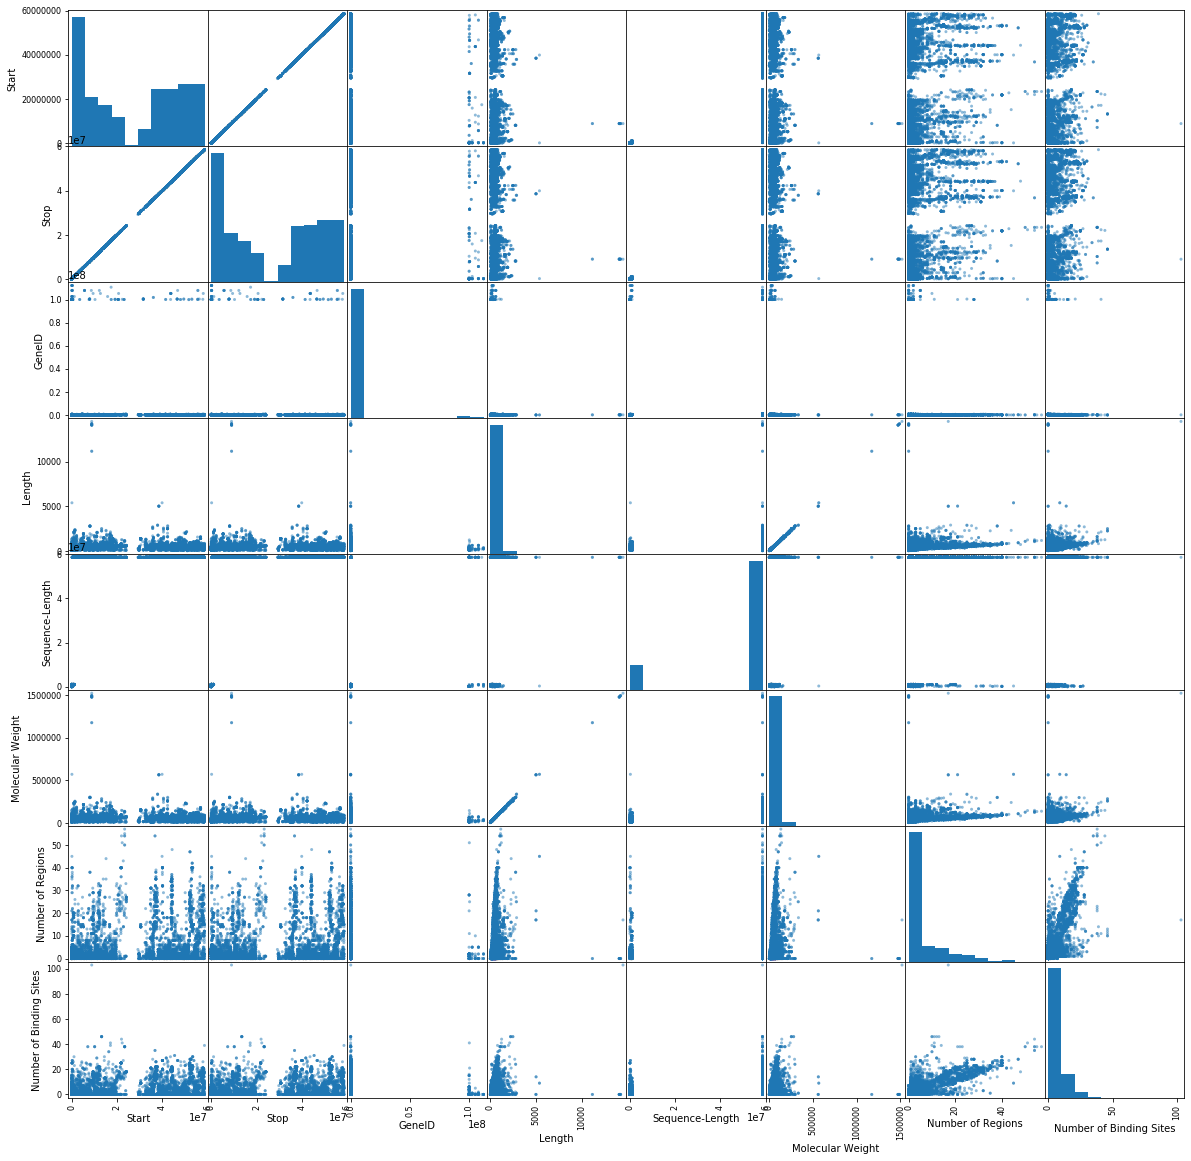

In [53]:
pd.plotting.scatter_matrix(df, figsize=(20,20));

In [56]:
import numpy as np
values, counts = np.unique(df['Locus'], return_counts=True)
locus_info = pd.DataFrame()
locus_info['Locus'] = values
locus_info['Occurances in Chromosome 19'] = counts
locus_info.nlargest(20, columns='Occurances in Chromosome 19')

,Locus,Occurances in Chromosome 19
504,KIR3DL2,94
338,FCAR,91
495,KIR2DL4,91
679,NCR1,83
501,KIR2DS4,63
499,KIR2DS2,61
127,CARD8,51
909,RPS9,49
748,OSCAR,48
1194,ZNF266,46


![amino acid naming convention](Amino-Acid-Codes.png)

In [61]:
Alanines = []
Arginines = []
Asparagines = []
Aspartic_acids = []
Cysteines = []
Glutamic_acids = []
Glutamines = []
Glycines = []
Histidines = []
Isoleucines = []
Leucines = []
Lysines = []
Methionines = []
Phenylalanines = []
Prolines = []
Selenocysteines = []
Serines = []
Threonines = []
Tryptophans = []
Tyrosines = []
Valines = []
for sequence in df['Sequence']:
    Alanine = 0
    Arginine = 0
    Asparagine = 0
    Aspartic_acid = 0
    Cysteine = 0
    Glutamic_acid = 0
    Glutamine = 0
    Glycine = 0
    Histidine = 0
    Isoleucine = 0
    Leucine = 0
    Lysine = 0
    Methionine = 0
    Phenylalanine = 0
    Proline = 0
    Selenocysteine = 0
    Serine = 0
    Threonine = 0
    Tryptophan = 0
    Tyrosine = 0
    Valine = 0
    for letter in sequence:
        if letter == 'a':
            Alanine += 1
        elif letter == 'r':
            Arginine += 1
        elif letter == 'n':
            Asparagine += 1
        elif letter == 'd':
            Aspartic_acid += 1
        elif letter == 'c':
            Cysteine += 1
        elif letter == 'e':
            Glutamic_acid += 1
        elif letter == 'q':
            Glutamine += 1
        elif letter == 'g':
            Glycine += 1
        elif letter == 'h':
            Histidine += 1
        elif letter == 'i':
            Isoleucine += 1
        elif letter == 'l':
            Leucine += 1
        elif letter == 'k':
            Lysine += 1
        elif letter == 'm':
            Methionine += 1
        elif letter == 'f':
            Phenylalanine += 1
        elif letter == 'p':
            Proline += 1
        elif letter == 'u':
            Selenocysteine += 1
        elif letter == 's':
            Serine += 1
        elif letter == 't':
            Threonine += 1
        elif letter == 'w':
            Tryptophan += 1
        elif letter == 'y':
            Tyrosine += 1
        elif letter == 'v':
            Valine += 1
        else:
            print('please revise amino acid list')
            print(letter)
    Alanines.append(Alanine)
    Arginines.append(Arginine)
    Asparagines.append(Asparagine)
    Aspartic_acids.append(Aspartic_acid)
    Cysteines.append(Cysteine)
    Glutamic_acids.append(Glutamic_acid)
    Glutamines.append(Glutamine)
    Glycines.append(Glycine)
    Histidines.append(Histidine)
    Isoleucines.append(Isoleucine)
    Leucines.append(Leucine)
    Lysines.append(Lysine)
    Methionines.append(Methionine)
    Phenylalanines.append(Phenylalanine)
    Prolines.append(Proline)
    Selenocysteines.append(Selenocysteine)
    Serines.append(Serine)
    Threonines.append(Threonine)
    Tryptophans.append(Tryptophan)
    Tyrosines.append(Tyrosine)
    Valines.append(Valine)
df['Number of Alanines'] = Alanines
df['Number of Arginines'] = Arginines
df['Number of Asparagines'] = Asparagines
df['Number of Aspartic Acids'] = Aspartic_acids
df['Number of Cysteines'] = Cysteines
df['Number of Glutamic Acids'] = Glutamic_acids
df['Number of Glutamines'] = Glutamines
df['Number of Glycines'] = Glycines
df['Number of Histidines'] = Histidines
df['Number of Isoleucines'] = Isoleucines
df['Number of Leucines'] = Leucines
df['Number of Lysines'] = Lysines
df['Number of Methionines'] = Methionines
df['Number of Phenylalanines'] = Phenylalanines
df['Number of Prolines'] = Prolines
df['Number of Selenocysteines'] = Selenocysteines
df['Number of Serines'] = Serines
df['Number of Threonines'] = Threonines
df['Number of Tryptophans'] = Tryptophans
df['Number of Tyrosines'] = Tyrosines
df['Number of Valines'] = Valines

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Data columns (total 44 columns):
#Replicon Name                     7981 non-null object
Start                              7981 non-null int64
Stop                               7981 non-null int64
Strand                             7981 non-null object
GeneID                             7981 non-null int64
Locus                              7981 non-null object
Protein product                    7981 non-null object
Length                             7981 non-null int64
Protein name                       7981 non-null object
# Sequence-Name                    7981 non-null object
Sequence-Role                      7981 non-null object
Assigned-Molecule-Location/Type    7981 non-null object
GenBank-Accn                       7981 non-null object
Relationship                       7981 non-null object
RefSeq-Accn                        7981 non-null object
Assembly-Unit                      7981 non-null object
S

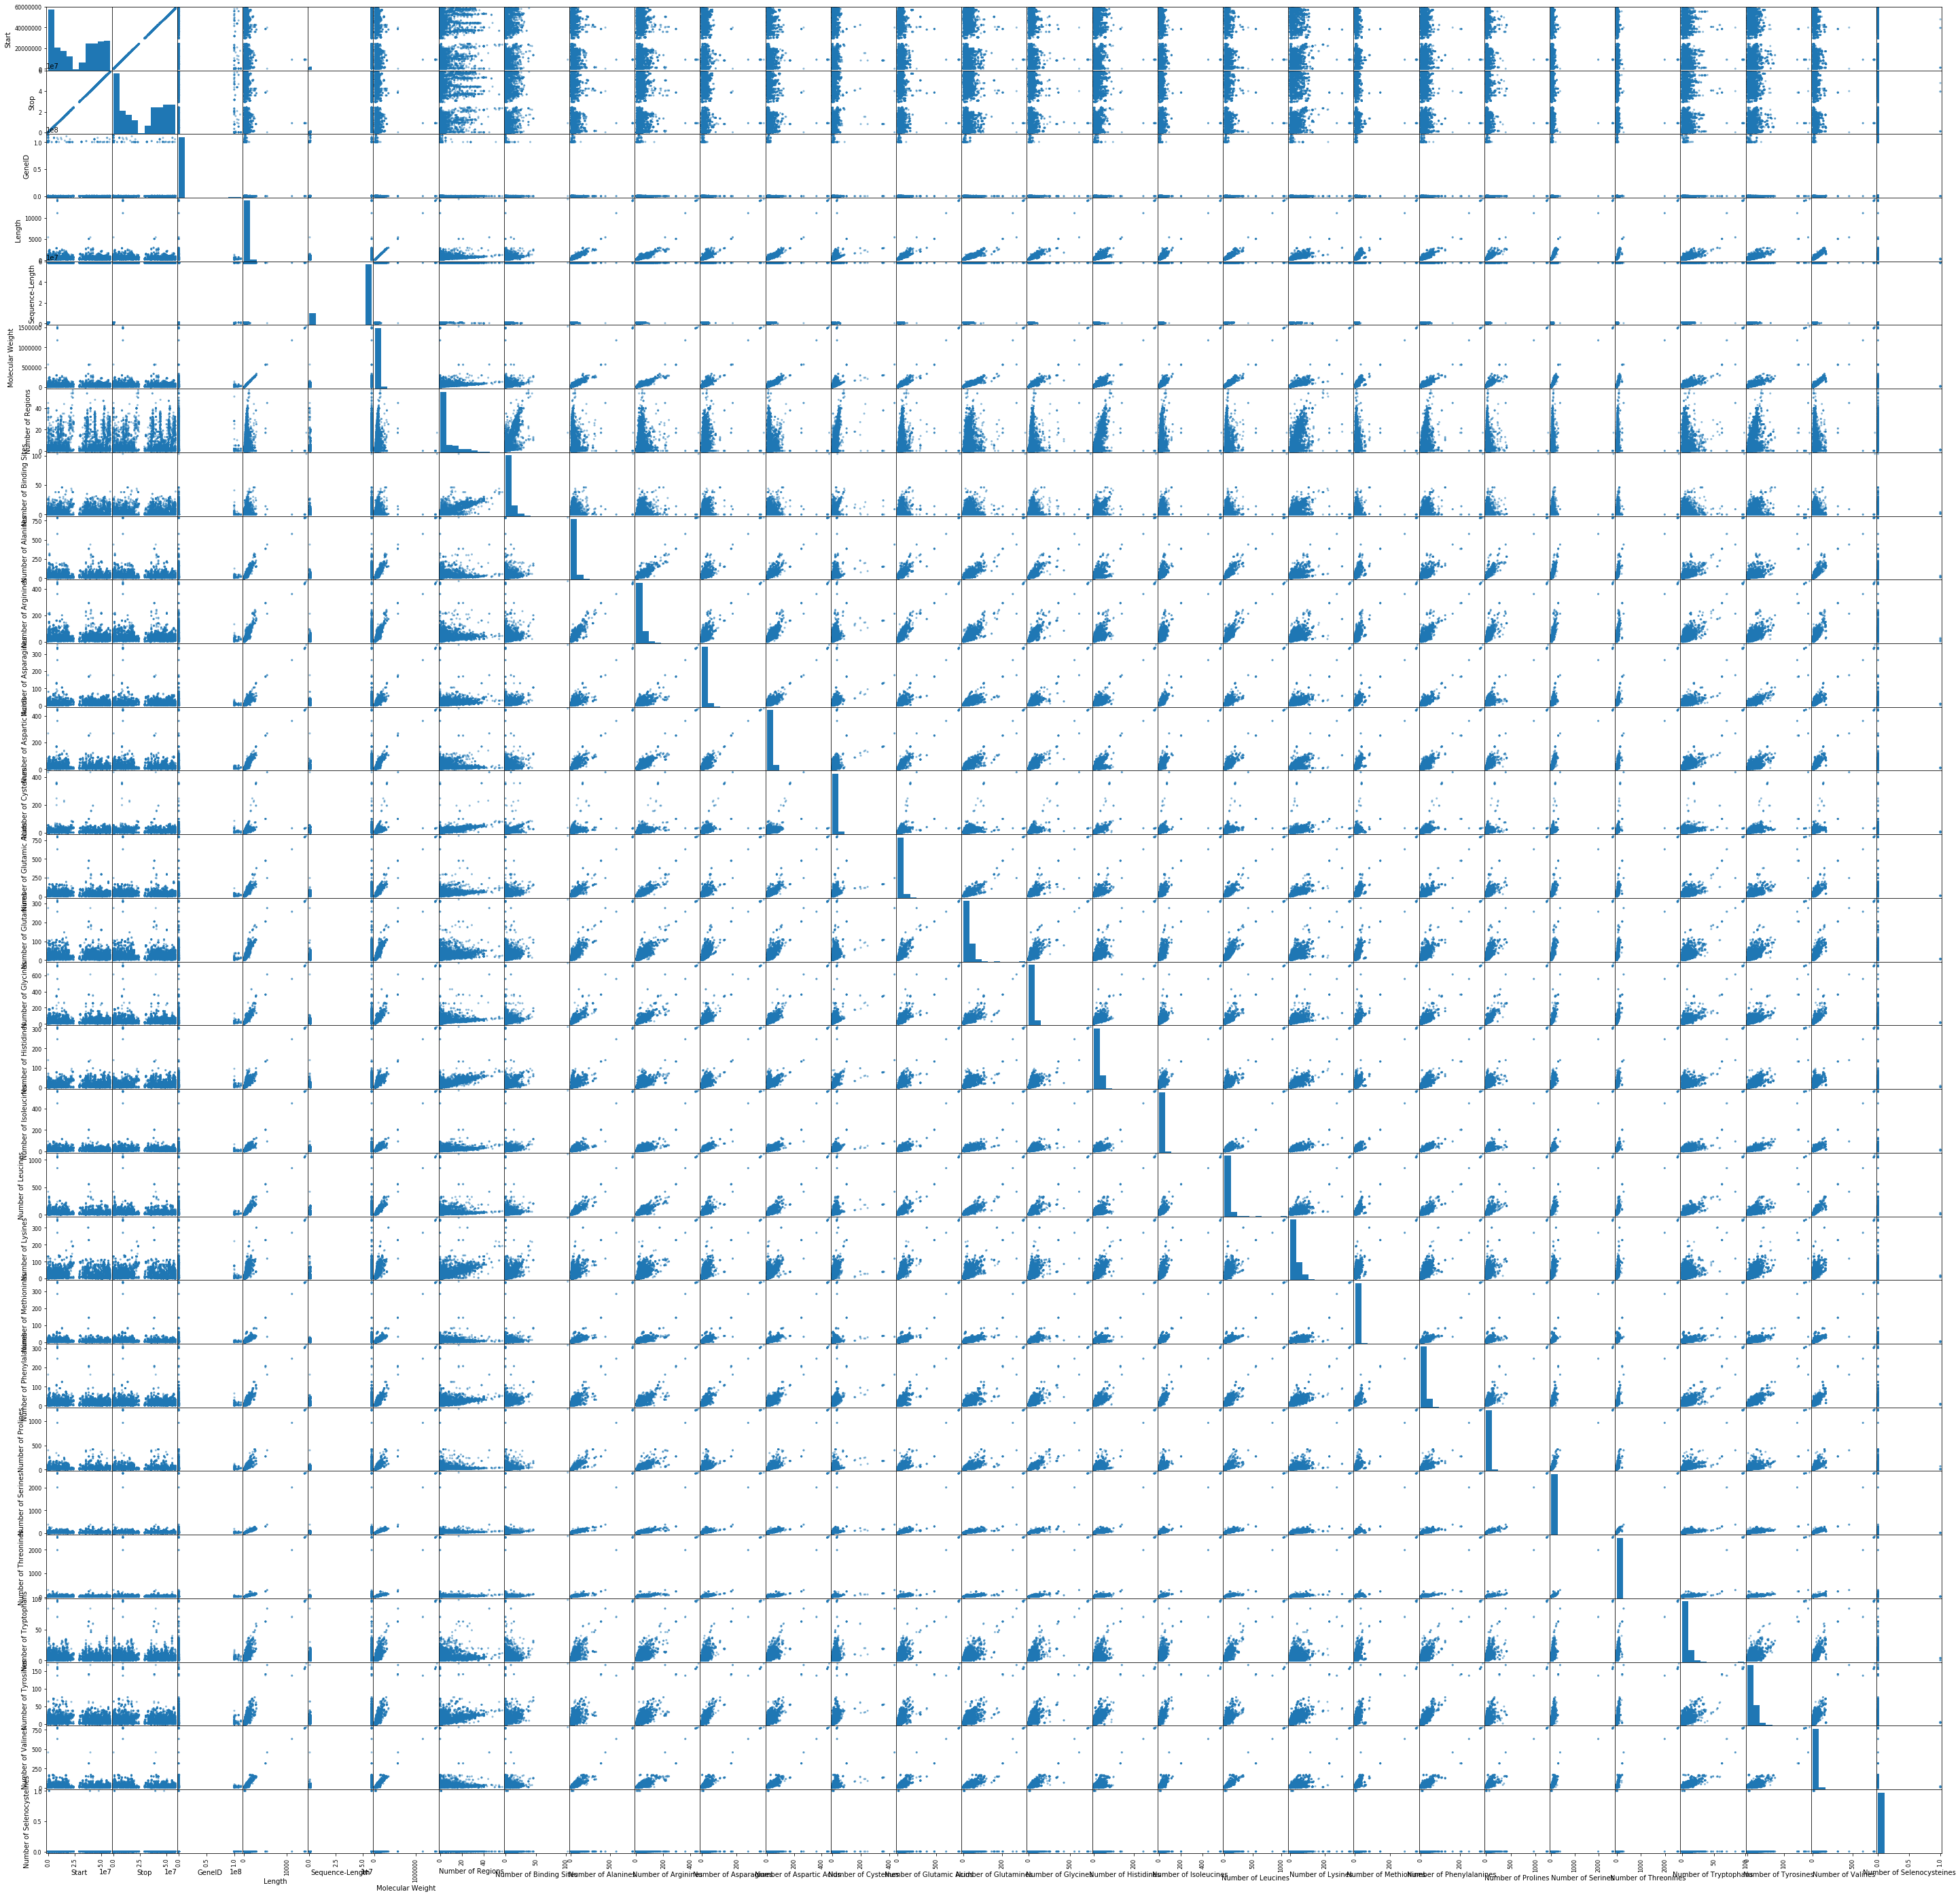

In [64]:
pd.plotting.scatter_matrix(df, figsize=(50,50));

In [65]:
df.describe()

,Start,Stop,GeneID,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,...,Number of Lysines,Number of Methionines,Number of Phenylalanines,Number of Prolines,Number of Serines,Number of Threonines,Number of Tryptophans,Number of Tyrosines,Number of Valines,Number of Selenocysteines
count,7.981000e+03,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,...,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000
mean,2.684549e+07,2.686286e+07,2.124244e+06,541.809673,4.931202e+07,5.949900e+04,6.145721,4.968801,38.168400,33.810425,...,28.825586,9.888360,19.083323,38.850395,47.295201,31.661070,6.720586,13.866683,29.357098,0.000877
std,2.077843e+07,2.077664e+07,1.429802e+07,657.361605,2.130346e+07,7.001105e+04,8.698425,6.850564,45.215759,31.391824,...,29.871813,16.019903,18.412169,59.629818,105.617939,100.073414,6.716781,12.519509,38.009938,0.029604
min,2.300000e+02,2.149000e+03,1.000000e+00,32.000000,4.315600e+04,3.380000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.684833e+06,5.687945e+06,7.305000e+03,284.000000,5.861762e+07,3.053300e+04,1.000000,0.000000,17.000000,17.000000,...,10.000000,4.000000,9.000000,17.000000,22.000000,14.000000,3.000000,6.000000,15.000000,0.000000
50%,3.044356e+07,3.071100e+07,5.453100e+04,444.000000,5.861762e+07,4.825000e+04,2.000000,2.000000,25.000000,27.000000,...,18.000000,7.000000,16.000000,27.000000,36.000000,23.000000,5.000000,11.000000,22.000000,0.000000
75%,4.672060e+07,4.673881e+07,9.402500e+04,640.000000,5.861762e+07,7.112400e+04,7.000000,7.000000,45.000000,40.000000,...,40.000000,11.000000,24.000000,42.000000,55.000000,35.000000,8.000000,19.000000,34.000000,0.000000
max,5.856316e+07,5.857330e+07,1.122684e+08,14507.000000,5.861762e+07,1.519051e+06,57.000000,103.000000,789.000000,459.000000,...,359.000000,358.000000,316.000000,1250.000000,2647.000000,2571.000000,98.000000,171.000000,783.000000,1.000000


In [66]:
# length features
df['Length by Weight'] = df['Molecular Weight'] / df['Length']
df['Length by Regions'] = df['Number of Regions'] / df['Length'] 
df['Length by Sites'] = df['Number of Binding Sites'] / df['Length']
df['Length by Alanines'] = df['Number of Alanines'] / df['Length']
df['Length by Arginines'] = df['Number of Arginines'] / df['Length']
df['Length by Asparagines'] = df['Number of Asparagines'] / df['Length']
df['Length by Aspartic Acids'] = df['Number of Aspartic Acids'] / df['Length']
df['Length by Cysteines'] = df['Number of Cysteines'] / df['Length']
df['Length by Glutamic Acids'] = df['Number of Glutamic Acids'] / df['Length']
df['Length by Glutamines'] = df['Number of Glutamines'] / df['Length']
df['Length by Glycines'] = df['Number of Glycines'] / df['Length']
df['Length by Histidines'] = df['Number of Histidines'] / df['Length']
df['Length by Isoleucines'] = df['Number of Isoleucines'] / df['Length']
df['Length by Leucines'] = df['Number of Leucines'] / df['Length']
df['Length by Lysines'] = df['Number of Lysines'] / df['Length']
df['Length by Methionines'] = df['Number of Methionines'] / df['Length']
df['Length by Phenylalanines'] = df['Number of Phenylalanines'] / df['Length']
df['Length by Prolines'] = df['Number of Prolines'] / df['Length']
df['Length by Selenocysteines'] = df['Number of Selenocysteines'] / df['Length']
df['Length by Serines'] = df['Number of Serines'] / df['Length']
df['Length by Threonines'] = df['Number of Threonines'] / df['Length']
df['Length by Tryptophans'] = df['Number of Tryptophans'] / df['Length']
df['Length by Tyrosines'] = df['Number of Tyrosines'] / df['Length']
df['Length by Valines'] = df['Number of Valines'] / df['Length']
# weight features
df['Weight by Regions'] = df['Number of Regions'] / df['Molecular Weight']
df['Weight by Sites'] = df['Number of Binding Sites'] / df['Molecular Weight']
df['Weight by Alanines'] = df['Number of Alanines'] / df['Molecular Weight']
df['Weight by Arginines'] = df['Number of Arginines'] / df['Molecular Weight']
df['Weight by Asparagines'] = df['Number of Asparagines'] / df['Molecular Weight']
df['Weight by Aspartic Acids'] = df['Number of Aspartic Acids'] / df['Molecular Weight']
df['Weight by Cysteines'] = df['Number of Cysteines'] / df['Molecular Weight']
df['Weight by Glutamic Acids'] = df['Number of Glutamic Acids'] / df['Molecular Weight']
df['Weight by Glutamines'] = df['Number of Glutamines'] / df['Molecular Weight']
df['Weight by Glycines'] = df['Number of Glycines'] / df['Molecular Weight']
df['Weight by Histidines'] = df['Number of Histidines'] / df['Molecular Weight']
df['Weight by Isoleucines'] = df['Number of Isoleucines'] / df['Molecular Weight']
df['Weight by Leucines'] = df['Number of Leucines'] / df['Molecular Weight']
df['Weight by Lysines'] = df['Number of Lysines'] / df['Molecular Weight']
df['Weight by Methionines'] = df['Number of Methionines'] / df['Molecular Weight']
df['Weight by Phenylalanines'] = df['Number of Phenylalanines'] / df['Molecular Weight']
df['Weight by Prolines'] = df['Number of Prolines'] / df['Molecular Weight']
df['Weight by Selenocysteines'] = df['Number of Selenocysteines'] / df['Molecular Weight']
df['Weight by Serines'] = df['Number of Serines'] / df['Molecular Weight']
df['Weight by Threonines'] = df['Number of Threonines'] / df['Molecular Weight']
df['Weight by Tryptophans'] = df['Number of Tryptophans'] / df['Molecular Weight']
df['Weight by Tyrosines'] = df['Number of Tyrosines'] / df['Molecular Weight']
df['Weight by Valines'] = df['Number of Valines'] / df['Molecular Weight']
df.sample(5)

,#Replicon Name,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,...,Weight by Lysines,Weight by Methionines,Weight by Phenylalanines,Weight by Prolines,Weight by Selenocysteines,Weight by Serines,Weight by Threonines,Weight by Tryptophans,Weight by Tyrosines,Weight by Valines
3411,19,37185227,37207111,negative,92285,ZNF585B,NP_689492.3,769,zinc finger protein 585B,19,...,0.000921,0.000057,0.000364,0.000307,0.0,0.000762,0.000591,0.000057,0.000341,0.000330
4559,19,44618329,44627715,positive,147710,IGSF23,XP_016881815.1,127,immunoglobulin superfamily member 23 isoform X8,19,...,0.000301,0.000376,0.000075,0.001128,0.0,0.000978,0.000752,0.000075,0.000226,0.000376
784,19,5917610,5925707,negative,8498,RANBP3,XP_011526695.1,286,ran-binding protein 3 isoform X1,19,...,0.000458,0.000262,0.000196,0.000327,0.0,0.001145,0.000654,0.000065,0.000131,0.000425
7244,19,55342811,55347449,positive,84787,KMT5C,XP_005259395.1,347,histone-lysine N-methyltransferase KMT5C isofo...,19,...,0.000388,0.000052,0.000258,0.001034,0.0,0.000362,0.000284,0.000207,0.000129,0.000439
3150,19,35758216,35768953,positive,148137,PROSER3,XP_011524830.1,802,proline and serine-rich protein 3 isoform X1,19,...,0.000332,0.000047,0.000261,0.001447,0.0,0.001293,0.000557,0.000202,0.000059,0.000379


In [67]:
df.isna().sum().sum()

0

In [68]:
columns = df.describe().columns
for column in columns:
    print(column)
    print(np.isinf(np.asarray(df[column])).sum())

Start
0
Stop
0
GeneID
0
Length
0
Sequence-Length
0
Molecular Weight
0
Number of Regions
0
Number of Binding Sites
0
Number of Alanines
0
Number of Arginines
0
Number of Asparagines
0
Number of Aspartic Acids
0
Number of Cysteines
0
Number of Glutamic Acids
0
Number of Glutamines
0
Number of Glycines
0
Number of Histidines
0
Number of Isoleucines
0
Number of Leucines
0
Number of Lysines
0
Number of Methionines
0
Number of Phenylalanines
0
Number of Prolines
0
Number of Serines
0
Number of Threonines
0
Number of Tryptophans
0
Number of Tyrosines
0
Number of Valines
0
Number of Selenocysteines
0
Length by Weight
0
Length by Regions
0
Length by Sites
0
Length by Alanines
0
Length by Arginines
0
Length by Asparagines
0
Length by Aspartic Acids
0
Length by Cysteines
0
Length by Glutamic Acids
0
Length by Glutamines
0
Length by Glycines
0
Length by Histidines
0
Length by Isoleucines
0
Length by Leucines
0
Length by Lysines
0
Length by Methionines
0
Length by Phenylalanines
0
Length by Proline

In [69]:
df.describe()

,Start,Stop,GeneID,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,...,Weight by Lysines,Weight by Methionines,Weight by Phenylalanines,Weight by Prolines,Weight by Selenocysteines,Weight by Serines,Weight by Threonines,Weight by Tryptophans,Weight by Tyrosines,Weight by Valines
count,7.981000e+03,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,...,7981.000000,7981.000000,7981.000000,7981.000000,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,7981.000000
mean,2.684549e+07,2.686286e+07,2.124244e+06,541.809673,4.931202e+07,5.949900e+04,6.145721,4.968801,38.168400,33.810425,...,0.000470,0.000175,0.000331,0.000653,4.359212e-08,0.000763,0.000494,0.000129,0.000242,0.000516
std,2.077843e+07,2.077664e+07,1.429802e+07,657.361605,2.130346e+07,7.001105e+04,8.698425,6.850564,45.215759,31.391824,...,0.000276,0.000097,0.000127,0.000325,1.649044e-06,0.000234,0.000166,0.000085,0.000112,0.000190
min,2.300000e+02,2.149000e+03,1.000000e+00,32.000000,4.315600e+04,3.380000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000017,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.684833e+06,5.687945e+06,7.305000e+03,284.000000,5.861762e+07,3.053300e+04,1.000000,0.000000,17.000000,17.000000,...,0.000269,0.000108,0.000241,0.000390,0.000000e+00,0.000598,0.000389,0.000064,0.000161,0.000384
50%,3.044356e+07,3.071100e+07,5.453100e+04,444.000000,5.861762e+07,4.825000e+04,2.000000,2.000000,25.000000,27.000000,...,0.000387,0.000159,0.000330,0.000610,0.000000e+00,0.000742,0.000475,0.000117,0.000243,0.000511
75%,4.672060e+07,4.673881e+07,9.402500e+04,640.000000,5.861762e+07,7.112400e+04,7.000000,7.000000,45.000000,40.000000,...,0.000635,0.000219,0.000415,0.000850,0.000000e+00,0.000904,0.000586,0.000174,0.000313,0.000643
max,5.856316e+07,5.857330e+07,1.122684e+08,14507.000000,5.861762e+07,1.519051e+06,57.000000,103.000000,789.000000,459.000000,...,0.002011,0.001058,0.001305,0.002644,1.073307e-04,0.002356,0.001707,0.000852,0.000729,0.001342


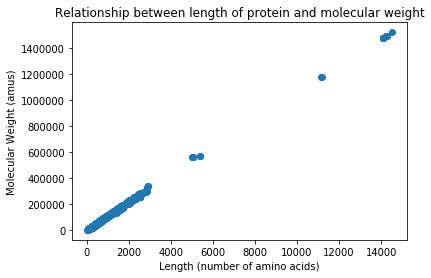

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(df['Length'], df['Molecular Weight'])
plt.ylabel('Molecular Weight (amus)')
plt.xlabel('Length (number of amino acids)')
plt.title('Relationship between length of protein and molecular weight');

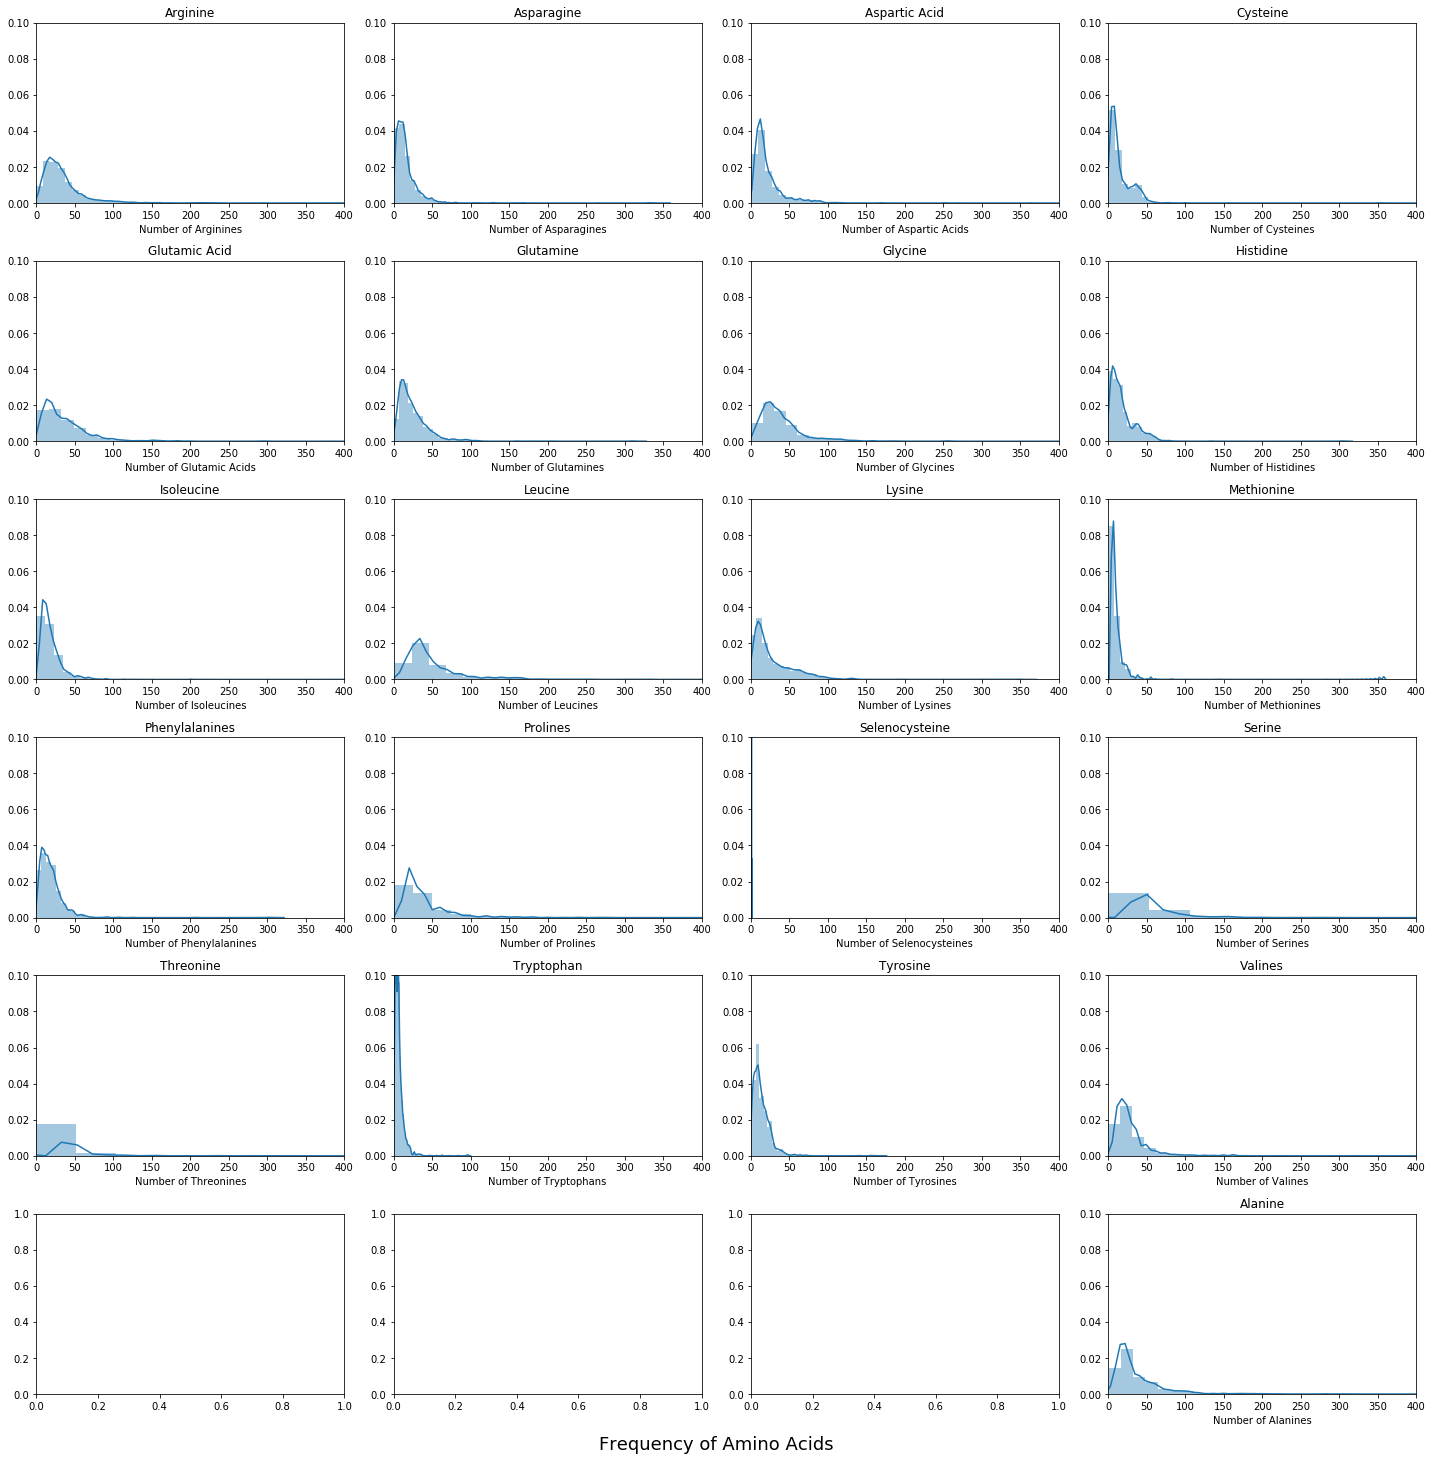

In [71]:
amino_acids_data = [df['Number of Alanines'], df['Number of Arginines'], df['Number of Asparagines'], 
                    df['Number of Aspartic Acids'], df['Number of Cysteines'], df['Number of Glutamic Acids'], 
                    df['Number of Glutamines'], df['Number of Glycines'], df['Number of Histidines'], 
                    df['Number of Isoleucines'], df['Number of Leucines'], df['Number of Lysines'],
                    df['Number of Methionines'], df['Number of Phenylalanines'], df['Number of Prolines'], 
                    df['Number of Selenocysteines'], df['Number of Serines'], df['Number of Threonines'], 
                    df['Number of Tryptophans'], df['Number of Tyrosines'], df['Number of Valines']]
amino_acids_names = ['Alanine', 'Arginine', 'Asparagine',  'Aspartic Acid', 'Cysteine', 'Glutamic Acid', 'Glutamine', 
                     'Glycine', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Phenylalanines', 'Prolines',
                     'Selenocysteine', 'Serine', 'Threonine', 'Tryptophan', 'Tyrosine', 'Valines']
fig00, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
for n in range(0, len(amino_acids_names)):
    row = (n-1)//4
    col = n%4-1
    ax = axes[row][col]
    sns.distplot(amino_acids_data[n], ax=ax).set_xlim(left=0, right=400)
    ax.set_ylim(top=0.1)
    ax.set_title('{}'.format(amino_acids_names[n]), fontsize=12)
fig00.suptitle('Frequency of Amino Acids', y=0, horizontalalignment='center', fontsize=18)
plt.tight_layout();

In [73]:
amino_acid_info = pd.read_csv('Amino acid information.csv')
amino_acid_info.head()

,Amino Acid,Abbreviation,Symbol,Weight
0,Alanine,Ala,A,89
1,Arginine,Arg,R,174
2,Asparagine,Asn,N,132
3,Aspartic acid,Asp,D,133
4,Cysteine,Cys,C,121


In [74]:
amino_acid_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
Amino Acid      21 non-null object
Abbreviation    21 non-null object
Symbol          21 non-null object
Weight          21 non-null int64
dtypes: int64(1), object(3)
memory usage: 800.0+ bytes


In [75]:
# amino acid weight contribution
df['Weight of Alanines'] = df['Number of Alanines'] * amino_acid_info.loc[0,'Weight']
df['Weight of Arginines'] = df['Number of Arginines'] * amino_acid_info.loc[1,'Weight']
df['Weight of Asparagines'] = df['Number of Asparagines'] * amino_acid_info.loc[2,'Weight']
df['Weight of Aspartic Acids'] = df['Number of Aspartic Acids'] * amino_acid_info.loc[3,'Weight']
df['Weight of Cysteines'] = df['Number of Cysteines'] * amino_acid_info.loc[4,'Weight']
df['Weight of Glutamic Acids'] = df['Number of Glutamic Acids'] * amino_acid_info.loc[5,'Weight']
df['Weight of Glutamines'] = df['Number of Glutamines'] * amino_acid_info.loc[6,'Weight']
df['Weight of Glycines'] = df['Number of Glycines'] * amino_acid_info.loc[7,'Weight']
df['Weight of Histidines'] = df['Number of Histidines'] * amino_acid_info.loc[8,'Weight']
df['Weight of Isoleucines'] = df['Number of Isoleucines'] * amino_acid_info.loc[9,'Weight']
df['Weight of Leucines'] = df['Number of Leucines'] * amino_acid_info.loc[10,'Weight']
df['Weight of Lysines'] = df['Number of Lysines'] * amino_acid_info.loc[11,'Weight']
df['Weight of Methionines'] = df['Number of Methionines'] * amino_acid_info.loc[12,'Weight']
df['Weight of Phenylalanines'] = df['Number of Phenylalanines'] * amino_acid_info.loc[13,'Weight']
df['Weight of Prolines'] = df['Number of Prolines'] * amino_acid_info.loc[14,'Weight']
df['Weight of Selenocysteines'] = df['Number of Selenocysteines'] * amino_acid_info.loc[15,'Weight']
df['Weight of Serines'] = df['Number of Serines'] * amino_acid_info.loc[16,'Weight']
df['Weight of Threonines'] = df['Number of Threonines'] * amino_acid_info.loc[17,'Weight']
df['Weight of Tryptophans'] = df['Number of Tryptophans'] * amino_acid_info.loc[18,'Weight']
df['Weight of Tyrosines'] = df['Number of Tyrosines'] * amino_acid_info.loc[19,'Weight']
df['Weight of Valines'] = df['Number of Valines'] * amino_acid_info.loc[20,'Weight']

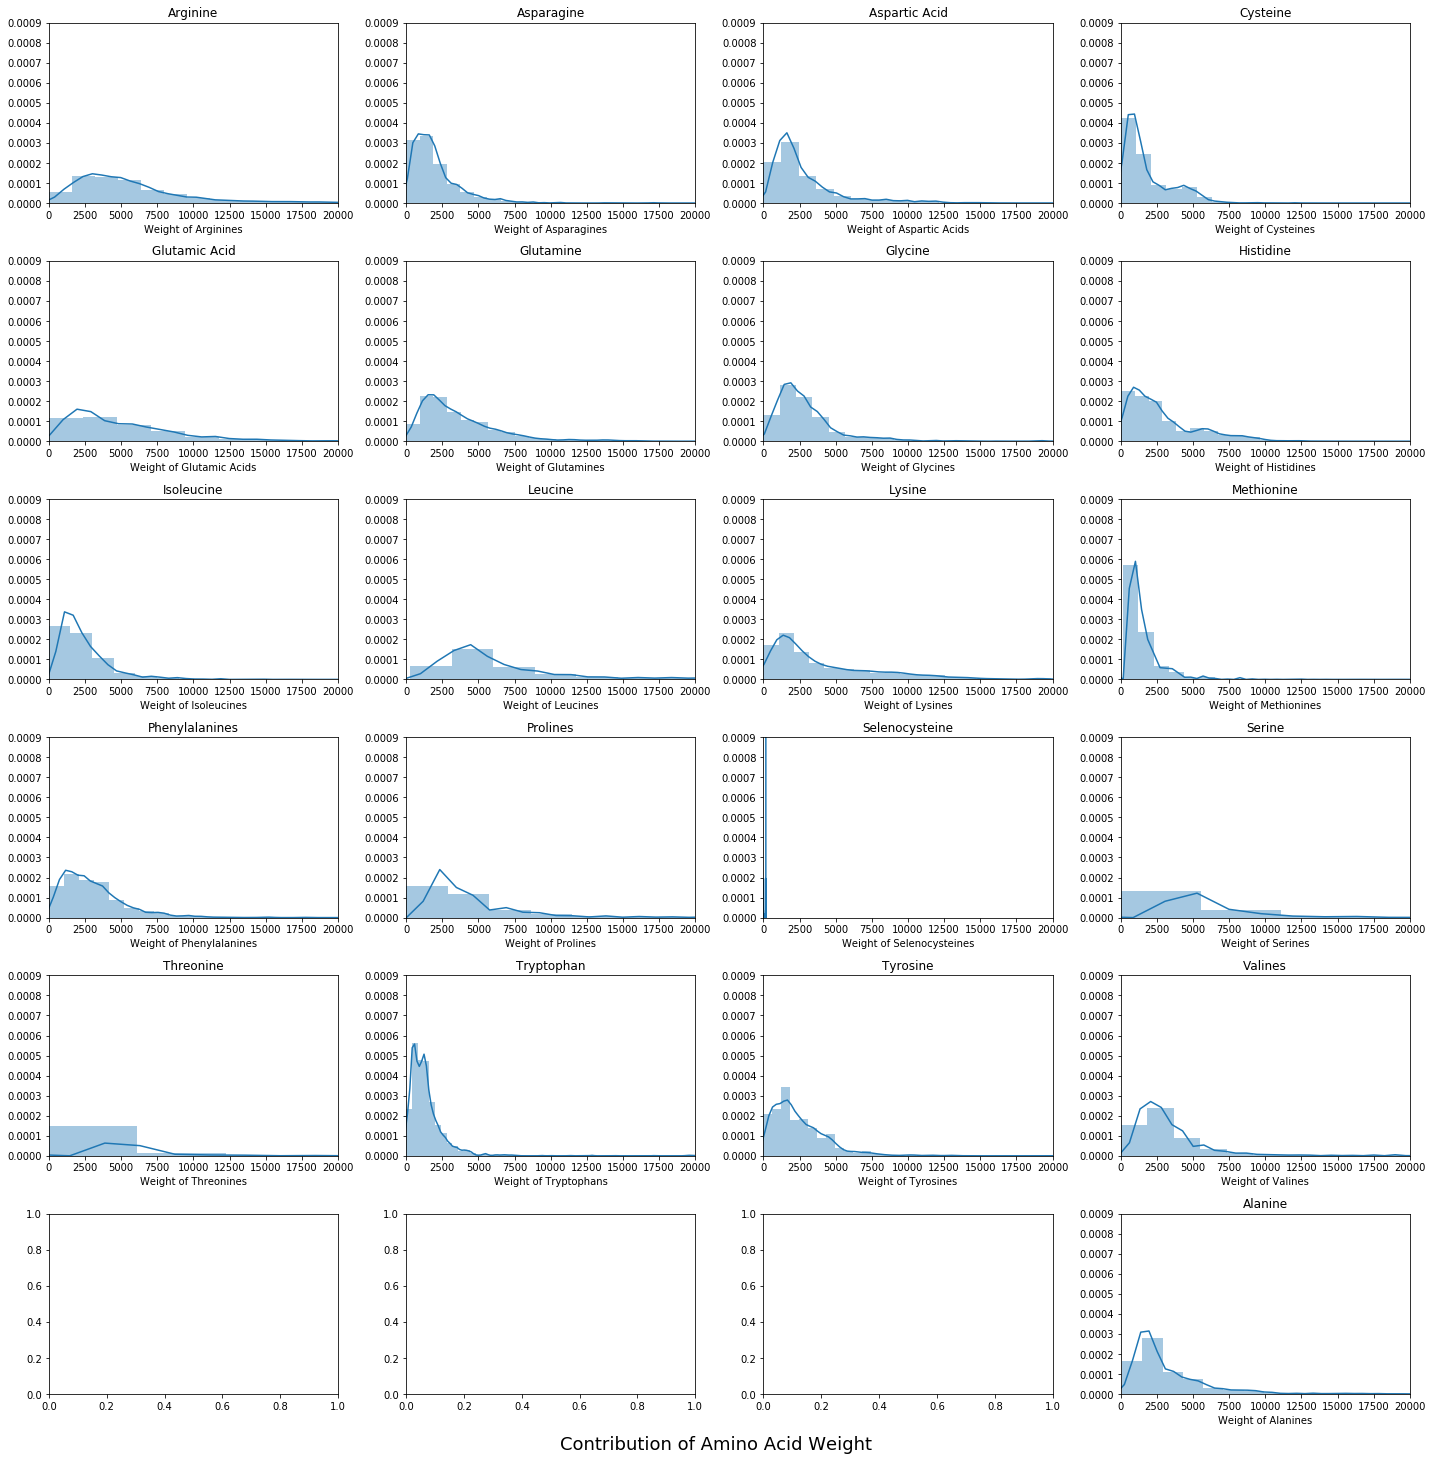

In [77]:
amino_acids_weight_data = [df['Weight of Alanines'], df['Weight of Arginines'], df['Weight of Asparagines'], 
                           df['Weight of Aspartic Acids'], df['Weight of Cysteines'], df['Weight of Glutamic Acids'], 
                           df['Weight of Glutamines'], df['Weight of Glycines'], df['Weight of Histidines'], 
                           df['Weight of Isoleucines'], df['Weight of Leucines'], df['Weight of Lysines'],
                           df['Weight of Methionines'], df['Weight of Phenylalanines'], df['Weight of Prolines'], 
                           df['Weight of Selenocysteines'], df['Weight of Serines'], df['Weight of Threonines'], 
                           df['Weight of Tryptophans'], df['Weight of Tyrosines'], df['Weight of Valines']]
amino_acids_names = ['Alanine', 'Arginine', 'Asparagine',  'Aspartic Acid', 'Cysteine', 'Glutamic Acid', 'Glutamine', 
                     'Glycine', 'Histidine', 'Isoleucine', 'Leucine', 'Lysine', 'Methionine', 'Phenylalanines', 'Prolines',
                     'Selenocysteine', 'Serine', 'Threonine', 'Tryptophan', 'Tyrosine', 'Valines']
fig00, axes = plt.subplots(nrows=6, ncols=4, figsize=(20,20))
for n in range(0, len(amino_acids_names)):
    row = (n-1)//4
    col = n%4-1
    ax = axes[row][col]
    sns.distplot(amino_acids_weight_data[n], ax=ax).set_xlim(left=0, right=20000)
    ax.set_ylim(top=0.0009)
    ax.set_title('{}'.format(amino_acids_names[n]), fontsize=12)
fig00.suptitle('Contribution of Amino Acid Weight', y=0, horizontalalignment='center', fontsize=18)
plt.tight_layout();

In [80]:
for i, j in enumerate(df.columns):
    print(i)
    print(j)

0
#Replicon Name
1
Start
2
Stop
3
Strand
4
GeneID
5
Locus
6
Protein product
7
Length
8
Protein name
9
# Sequence-Name
10
Sequence-Role
11
Assigned-Molecule-Location/Type
12
GenBank-Accn
13
Relationship
14
RefSeq-Accn
15
Assembly-Unit
16
Sequence-Length
17
UCSC-style-name
18
Accession Version
19
Molecular Weight
20
Number of Regions
21
Number of Binding Sites
22
Sequence
23
Number of Alanines
24
Number of Arginines
25
Number of Asparagines
26
Number of Aspartic Acids
27
Number of Cysteines
28
Number of Glutamic Acids
29
Number of Glutamines
30
Number of Glycines
31
Number of Histidines
32
Number of Isoleucines
33
Number of Leucines
34
Number of Lysines
35
Number of Methionines
36
Number of Phenylalanines
37
Number of Prolines
38
Number of Serines
39
Number of Threonines
40
Number of Tryptophans
41
Number of Tyrosines
42
Number of Valines
43
Number of Selenocysteines
44
Length by Weight
45
Length by Regions
46
Length by Sites
47
Length by Alanines
48
Length by Arginines
49
Length by Aspa

In [81]:
continuous = list(df.columns[19:22]) + list(df.columns[23:])
continuous

['Molecular Weight',
 'Number of Regions',
 'Number of Binding Sites',
 'Number of Alanines',
 'Number of Arginines',
 'Number of Asparagines',
 'Number of Aspartic Acids',
 'Number of Cysteines',
 'Number of Glutamic Acids',
 'Number of Glutamines',
 'Number of Glycines',
 'Number of Histidines',
 'Number of Isoleucines',
 'Number of Leucines',
 'Number of Lysines',
 'Number of Methionines',
 'Number of Phenylalanines',
 'Number of Prolines',
 'Number of Serines',
 'Number of Threonines',
 'Number of Tryptophans',
 'Number of Tyrosines',
 'Number of Valines',
 'Number of Selenocysteines',
 'Length by Weight',
 'Length by Regions',
 'Length by Sites',
 'Length by Alanines',
 'Length by Arginines',
 'Length by Asparagines',
 'Length by Aspartic Acids',
 'Length by Cysteines',
 'Length by Glutamic Acids',
 'Length by Glutamines',
 'Length by Glycines',
 'Length by Histidines',
 'Length by Isoleucines',
 'Length by Leucines',
 'Length by Lysines',
 'Length by Methionines',
 'Length by Phe

In [82]:
polynomial_terms = [2,3]
for term in polynomial_terms:
    df['Length**'+str(term)] = df['Length']**term 
for cont in continuous:
    for term in polynomial_terms:
        df[cont+'**'+str(term)] = df[cont]**term

In [83]:
df.sample(5)

,#Replicon Name,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
2166,19,17250225,17264299,negative,83878,USHBP1,NP_001308346.1,703,Usher syndrome type-1C protein-binding protein...,19,...,43758225,289460658375,6245001,15606257499,2039184,2911954752,1179396,1280824056,9253764,28149950088
6891,Un,244529,260102,positive,2204,FCAR,NP_579812.1,253,immunoglobulin alpha Fc receptor isoform h,HSCHR19KIR_FH05_B_HAP_CTG3_1,...,4862025,10720765125,2393209,3702294323,374544,229220928,3276100,5929741000,2683044,4394826072
3375,19,36922771,36951088,positive,374900,ZNF568,NP_001191764.1,643,zinc finger protein 568 isoform 2,19,...,32148900,182284263000,16370116,66233489336,1040400,1061208000,11826721,40672093519,10732176,35158608576
4645,19,45380190,45398318,negative,10848,PPP1R13L,XP_016881666.1,828,relA-associated inhibitor isoform X1,19,...,68807025,570754272375,18352656,78622778304,5035536,11299742784,10614564,34582249512,11512449,39061739457
3659,19,38900033,38908832,positive,4793,NFKBIB,NP_002494.2,356,NF-kappa-B inhibitor beta isoform 1,19,...,4410000,9261000000,3625216,6902411264,374544,229220928,2096704,3036027392,3956121,7868724669


In [84]:
df.describe()

,Start,Stop,GeneID,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
count,7.981000e+03,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,...,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03
mean,2.684549e+07,2.686286e+07,2.124244e+06,541.809673,4.931202e+07,5.949900e+04,6.145721,4.968801,38.168400,33.810425,...,1.476312e+08,3.120884e+13,1.559955e+08,4.093666e+13,3.756917e+06,2.431349e+10,1.143370e+07,1.054670e+11,3.157250e+07,1.335664e+12
std,2.077843e+07,2.077664e+07,1.429802e+07,657.361605,2.130346e+07,7.001105e+04,8.698425,6.850564,45.215759,31.391824,...,2.881577e+09,7.816783e+14,3.468645e+09,1.030384e+15,1.716183e+07,3.045903e+11,4.181545e+07,1.110292e+12,3.210278e+08,2.815048e+13
min,2.300000e+02,2.149000e+03,1.000000e+00,32.000000,4.315600e+04,3.380000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.684833e+06,5.687945e+06,7.305000e+03,284.000000,5.861762e+07,3.053300e+04,1.000000,0.000000,17.000000,17.000000,...,5.336100e+06,1.232639e+10,2.775556e+06,4.624076e+09,3.745440e+05,2.292209e+08,1.179396e+06,1.280824e+09,3.080025e+06,5.405444e+09
50%,3.044356e+07,3.071100e+07,5.453100e+04,444.000000,5.861762e+07,4.825000e+04,2.000000,2.000000,25.000000,27.000000,...,1.428840e+07,5.401015e+10,7.491169e+06,2.050333e+10,1.040400e+06,1.061208e+09,3.964081e+06,7.892485e+09,6.625476e+06,1.705398e+10
75%,4.672060e+07,4.673881e+07,9.402500e+04,640.000000,5.861762e+07,7.112400e+04,7.000000,7.000000,45.000000,40.000000,...,3.335062e+07,1.925999e+11,1.734722e+07,7.225119e+10,2.663424e+06,4.346708e+09,1.182672e+07,4.067209e+10,1.582448e+07,6.294980e+10
max,5.856316e+07,5.857330e+07,1.122684e+08,14507.000000,5.861762e+07,1.519051e+06,57.000000,103.000000,789.000000,459.000000,...,7.724786e+10,2.146989e+16,9.360479e+10,2.863829e+16,3.996801e+08,7.990404e+12,9.579644e+08,2.964996e+13,8.392575e+09,7.688522e+14


In [85]:
df.isna().sum().sum()

0

In [86]:
columns = df.describe().columns
for column in columns:
    print(column)
    print(np.isinf(np.asarray(df[column])).sum())

Start
0
Stop
0
GeneID
0
Length
0
Sequence-Length
0
Molecular Weight
0
Number of Regions
0
Number of Binding Sites
0
Number of Alanines
0
Number of Arginines
0
Number of Asparagines
0
Number of Aspartic Acids
0
Number of Cysteines
0
Number of Glutamic Acids
0
Number of Glutamines
0
Number of Glycines
0
Number of Histidines
0
Number of Isoleucines
0
Number of Leucines
0
Number of Lysines
0
Number of Methionines
0
Number of Phenylalanines
0
Number of Prolines
0
Number of Serines
0
Number of Threonines
0
Number of Tryptophans
0
Number of Tyrosines
0
Number of Valines
0
Number of Selenocysteines
0
Length by Weight
0
Length by Regions
0
Length by Sites
0
Length by Alanines
0
Length by Arginines
0
Length by Asparagines
0
Length by Aspartic Acids
0
Length by Cysteines
0
Length by Glutamic Acids
0
Length by Glutamines
0
Length by Glycines
0
Length by Histidines
0
Length by Isoleucines
0
Length by Leucines
0
Length by Lysines
0
Length by Methionines
0
Length by Phenylalanines
0
Length by Proline

In [87]:
df.to_csv('developed features 19.csv')

References
https://www.ncbi.nlm.nih.gov/books/NBK1528/table/app3.T.amino_acid_abbreviations/ # amino acid codes
https://www.ddbj.nig.ac.jp/ddbj/code-e.html # amino acid code u
https://en.wikipedia.org/wiki/Selenocysteine # atomic weight for amino acid code u
https://www.promega.com/~/media/files/resources/technical%20references/amino%20acid%20abbreviations%20and%20molecular%20weights.pdf # amino acid info